In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
#nltk.download('punkt')

In [3]:
# data_1 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 35 CSV.csv", encoding='latin-1')
# data_2 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 37 CSV.csv", encoding='latin-1')
# data_3 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 38 CSV.csv", encoding='latin-1')
# data_4 = pd.read_csv("Adidas GPMT/GPMT Project/15th Oct 39 CSV.csv", encoding='latin-1')
# data = data_1.append(data_2, ignore_index=True)
# data = data.append(data_3, ignore_index=True)
data = pd.read_csv("D:/GPMT/Language Check/CHN_own.csv", encoding='utf-8')
data.head()

,date,name,currency,language,name2,name3,ageGroup,articleId,colors,colorGroup,...,name4,ped,pid,sportsCategory,subBrand,technologies,tname,type,url,shippings
0,09/10/2018,adidas,CNY,zh-CN,CHN,own eCom,adults,019228,黑色/亮白/红,黑色,...,MUNDIAL TEAM 经典足球鞋 - 黑色/亮白/红,NaN,01/21/2015,足球,Performance,TRAXION|EVA,MUNDIAL TEAM Classic soccer shoes - black / br...,NaN,https://www.adidas.com.cn/item/019228?locale=z...,NaN
1,09/10/2018,adidas,CNY,zh-CN,CHN,own eCom,adults,280647,1号黑色/亮白,黑色,...,ADILETTE 拖鞋 - 1号黑色/亮白,NaN,05/02/2017,训练,Sport inspired,NaN,ADILETTE Slippers - No. 1 Black / Bright White,NaN,https://www.adidas.com.cn/item/280647?locale=z...,NaN
2,09/10/2018,adidas,CNY,zh-CN,CHN,own eCom,adults,288022,蓝/白,蓝色,...,ADILETTE 拖鞋 - 蓝/白,NaN,05/02/2017,NaN,Sport inspired,NaN,ADILETTE Slippers - Blue/White,NaN,https://www.adidas.com.cn/item/288022?locale=z...,NaN
3,09/10/2018,adidas,CNY,zh-CN,CHN,own eCom,adults,802310,黑/白,黑色,...,泳帽 - 黑/白,NaN,07/20/2017,游泳,Performance,NaN,Swimming cap - black / white,NaN,https://www.adidas.com.cn/item/802310?locale=z...,NaN
4,09/10/2018,adidas,CNY,zh-CN,CHN,own eCom,adults,AA2285,白/白/黑,白色,...,短袜 - 白/白/黑,NaN,12/14/2015,训练,Performance,NaN,Socks - White / White / Black,NaN,https://www.adidas.com.cn/item/AA2285?locale=z...,NaN


In [4]:
data.isnull().sum()

date                    0
name                    0
currency                0
language                0
name2                   0
name3                   0
ageGroup             6025
articleId               0
colors               3573
colorGroup          33104
consumerRating          0
currentPrice            0
description         22320
discountedSince     59627
division                0
gender               6830
group               32949
imageUrl                1
initialPrice            0
modelNumber             0
name4                   0
ped                104902
pid                     0
sportsCategory      23966
subBrand            50545
technologies        89844
tname                7950
type                75610
url                     0
shippings          114327
dtype: int64

In [5]:
data.language.unique()

array(['zh-CN', 'en-US'], dtype=object)

In [6]:
data.subBrand.unique()

array(['Performance', 'Sport inspired', nan, 'adidas by Stella McCartney',
       'adidas neo', 'ADIDAS ATHLETICS', '运动型格', 'SMC', 'Sportswear',
       'Jordan'], dtype=object)

In [7]:
# Filtering US and UK
#data = data.loc[data["language"].isin(['it-IT'])]

In [8]:
#data.group.unique()

In [9]:
data_req = data.loc[:,["name", "description", "division","sportsCategory", "subBrand", "group", "name2", "name3", "name4", "url"]]

In [10]:
data_req = data_req.drop_duplicates()

In [11]:
len(data_req)

32625

In [12]:
data_req_x = data_req.loc[:,["name", "description", "division", "group", "name2", "name3", "name4", "subBrand", "url"]]
data_req_y = data_req.loc[:, ["sportsCategory"]]

In [13]:
data_req_x = data_req_x.fillna("unknown")
data_req = pd.concat([data_req_x, data_req_y], axis=1)

In [14]:
len(data_req)

32625

In [15]:
data_req = data_req.dropna()

In [16]:
data_req = data_req.drop_duplicates()

In [17]:
data_req["description"]  = data_req["name"] +" " + data_req["description"] +" " + data_req["division"] +" " + data_req["group"] +" " + data_req["name2"]+" " + data_req["name3"]+" " + data_req["name4"]+" " + data_req["subBrand"]+" " + data_req["url"]

In [18]:
data_req = data_req.drop(["name", "division", "group", "name2", "name3", "name4", "subBrand","url"], axis = 1)

In [19]:
data_req.columns = ["description", "subBrand"]

In [20]:
data_req.subBrand.unique()

array(['足球', '训练', '游泳', 'Lifestyle', 'Training', '篮球', '跑步', '户外', '网球',
       'Running', '高尔夫', '运动型格', 'Football', '骑行', '羽毛球', 'yoga', '休闲',
       '健身/训练', '滑板', 'Skate', 'Casual', 'Basketball', '田径', '瑜珈',
       'Soccer', '动感单车', '运动休闲Sportstyle', '足球Teamsport', '基础Fundamental',
       '赛车Motorsport', 'Driving', '登山', '瑜伽', '徒步', '冲浪', '棒球', '其他',
       'training', 'run', 'to + from', 'swim', '足球系列', '篮球系列', '户外系列',
       '生活系列', '跑步系列', '综训系列', '网球系列', '时尚系列', '乒乓球', '韦德', '运动时尚',
       '棒球/垒球', '美式橄榄球', 'AKOS', '排球'], dtype=object)

In [21]:
len(data_req)

24443

In [22]:
data_req = data_req.drop_duplicates()

In [23]:
data_req.subBrand = data_req.subBrand.str.lower()
data_req.description = data_req.description.str.lower()

In [24]:
data_req.subBrand.unique()

array(['足球', '训练', '游泳', 'lifestyle', 'training', '篮球', '跑步', '户外', '网球',
       'running', '高尔夫', '运动型格', 'football', '骑行', '羽毛球', 'yoga', '休闲',
       '健身/训练', '滑板', 'skate', 'casual', 'basketball', '田径', '瑜珈',
       'soccer', '动感单车', '运动休闲sportstyle', '足球teamsport', '基础fundamental',
       '赛车motorsport', 'driving', '登山', '瑜伽', '徒步', '冲浪', '棒球', '其他',
       'run', 'to + from', 'swim', '足球系列', '篮球系列', '户外系列', '生活系列', '跑步系列',
       '综训系列', '网球系列', '时尚系列', '乒乓球', '韦德', '运动时尚', '棒球/垒球', '美式橄榄球',
       'akos', '排球'], dtype=object)

In [25]:
lens = data_req.description.str.len()
lens.mean(), lens.std(), lens.max()

(358.2009573292967, 278.80183818283126, 1915)

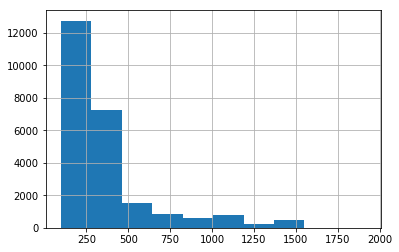

In [26]:
lens.hist();

In [27]:
data_req = data_req.dropna()

In [28]:
len(data_req)

24443

In [29]:
one_hot = pd.get_dummies(data_req.subBrand)

In [30]:
label_cols = data_req.subBrand.dropna().unique()

In [31]:
label_cols

array(['足球', '训练', '游泳', 'lifestyle', 'training', '篮球', '跑步', '户外', '网球',
       'running', '高尔夫', '运动型格', 'football', '骑行', '羽毛球', 'yoga', '休闲',
       '健身/训练', '滑板', 'skate', 'casual', 'basketball', '田径', '瑜珈',
       'soccer', '动感单车', '运动休闲sportstyle', '足球teamsport', '基础fundamental',
       '赛车motorsport', 'driving', '登山', '瑜伽', '徒步', '冲浪', '棒球', '其他',
       'run', 'to + from', 'swim', '足球系列', '篮球系列', '户外系列', '生活系列', '跑步系列',
       '综训系列', '网球系列', '时尚系列', '乒乓球', '韦德', '运动时尚', '棒球/垒球', '美式橄榄球',
       'akos', '排球'], dtype=object)

In [32]:
minCount = 10
subBrand_minCount = pd.DataFrame((data_req.subBrand.value_counts() > minCount).reset_index())

In [33]:
subBrand_drop = subBrand_minCount.loc[subBrand_minCount["subBrand"] == False]

In [34]:
subBrand_drop

,index,subBrand
41,swim,False
42,其他,False
43,driving,False
44,soccer,False
45,棒球/垒球,False
46,网球系列,False
47,动感单车,False
48,骑行,False
49,排球,False
50,冲浪,False


In [35]:
label_cols = np.setdiff1d(label_cols, subBrand_drop["index"])

In [36]:
data_req = pd.concat([data_req, one_hot], axis=1)

In [37]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [38]:
description = "description"

In [39]:
data_req = data_req.drop(subBrand_drop["index"], axis = 1)

In [40]:
np.random.seed(123)
data_req_sample = data_req.sample(frac=0.7)

In [41]:
train = data_req.loc[data_req.index.isin(data_req_sample.index)]
test = data_req.loc[~data_req.index.isin(data_req_sample.index)]

In [42]:
test_subBrand = test.subBrand

In [43]:
#test_subBrand

In [44]:
train = train.drop("subBrand", axis = 1)
test = test.drop("subBrand", axis = 1)

In [45]:
# token_dict = {}
# stemmer = PorterStemmer()

# def stem_tokens(tokens, stemmer):
#     stemmed = []
#     for item in tokens:
#         stemmed.append(stemmer.stem(item))
#     return stemmed

# def tokenize(text):
#     tokens = nltk.word_tokenize(text)
#     stems = stem_tokens(tokens, stemmer)
#     return stems

In [46]:
# from stop_words import get_stop_words
# stop_words_english = get_stop_words('english')
# stop_words_german = get_stop_words('german')

In [47]:
#stop_words_english.append(stop_words_german)

In [48]:
# stop_words_english = sorted(set(map(tuple, stop_words_english)), reverse=True)

In [49]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words = None )
trn_term_doc = vec.fit_transform(train[description])
test_term_doc = vec.transform(test[description])

In [50]:
trn_term_doc, test_term_doc

(<17110x58372 sparse matrix of type '<class 'numpy.float64'>'
 	with 1775927 stored elements in Compressed Sparse Row format>,
 <7333x58372 sparse matrix of type '<class 'numpy.float64'>'
 	with 752054 stored elements in Compressed Sparse Row format>)

In [51]:
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [52]:
x = trn_term_doc
test_x = test_term_doc

In [53]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit akos
fit basketball
fit football
fit lifestyle
fit run
fit running
fit skate
fit to + from
fit training
fit yoga
fit 休闲
fit 健身/训练
fit 基础fundamental
fit 徒步
fit 户外
fit 户外系列
fit 时尚系列
fit 游泳
fit 滑板
fit 瑜伽
fit 瑜珈
fit 生活系列
fit 田径
fit 登山
fit 篮球
fit 篮球系列
fit 综训系列
fit 网球
fit 羽毛球
fit 训练
fit 赛车motorsport
fit 足球
fit 足球teamsport
fit 足球系列
fit 跑步
fit 跑步系列
fit 运动休闲sportstyle
fit 运动型格
fit 运动时尚
fit 韦德
fit 高尔夫


In [56]:
preds.shape

(7333, 41)

In [57]:
predictions = pd.DataFrame(preds, columns = label_cols)

In [58]:
test.index = np.arange(0, len(test))
test_subBrand.index = np.arange(0, len(test))

In [59]:
len(test)

7333

In [60]:
submid = pd.DataFrame({'description': test["description"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [61]:
submission.head()

,description,akos,basketball,football,lifestyle,run,running,skate,to + from,training,...,足球,足球teamsport,足球系列,跑步,跑步系列,运动休闲sportstyle,运动型格,运动时尚,韦德,高尔夫
0,adidas mundial team 经典足球鞋 一款经典足球鞋 copa mundial...,0.000112,0.000184,0.000209,0.000218,0.000272,0.000429,0.000147,0.000312,0.001274,...,0.382488,0.000294,0.000163,0.010291,0.000254,0.000274,0.000390,0.000265,0.000166,0.003045
1,adidas adilette 拖鞋 自1972年推出，adilette便成为了全球畅销的运...,0.000107,0.000184,0.000226,0.000654,0.000270,0.000760,0.000094,0.000314,0.001960,...,0.011132,0.000228,0.000160,0.002020,0.000315,0.000216,0.001306,0.000212,0.000139,0.001479
2,adidas 低跟袜 旨在适合高强度训练的短袜。隐藏式设计，罗纹袜口和足弓设计，旨在带来更多...,0.000344,0.000205,0.000261,0.000368,0.000292,0.002927,0.000161,0.000329,0.046705,...,0.013276,0.000232,0.000174,0.006731,0.000171,0.000250,0.003188,0.000241,0.000159,0.001067
3,adidas terrex agravic xt 户外鞋 户外运动鞋 这款户外运动鞋，旨在助...,0.000109,0.000185,0.000170,0.000293,0.000275,0.001798,0.000139,0.000310,0.001503,...,0.003171,0.000217,0.000161,0.008847,0.000250,0.000293,0.000386,0.000290,0.000139,0.001028
4,adidas a16+ ultraboost 足球鞋 shoes unknown chn o...,0.000094,0.000194,0.000275,0.000549,0.000248,0.001013,0.000113,0.000295,0.001784,...,0.540592,0.000213,0.002527,0.111172,0.000449,0.000141,0.002181,0.000085,0.000146,0.001206


In [62]:
final_pred = pd.concat([submission, test_subBrand.str.lower()],axis = 1)

In [63]:
test_subBrand.str.lower().value_counts()

休闲                1209
训练                 914
跑步                 830
篮球                 471
生活系列               468
运动时尚               312
运动休闲sportstyle     282
足球                 277
跑步系列               256
yoga               221
综训系列               211
run                206
健身/训练              203
training           196
to + from          149
高尔夫                147
基础fundamental      109
running            104
篮球系列               101
羽毛球                 77
户外                  76
足球teamsport         70
网球                  64
登山                  44
运动型格                35
滑板                  34
时尚系列                33
lifestyle           33
户外系列                31
足球系列                29
basketball          22
akos                15
徒步                  12
瑜珈                  11
田径                  11
赛车motorsport        10
韦德                   9
瑜伽                   8
游泳                   7
football             6
skate                5
棒球/垒球                4
driving              4
swim       

In [64]:
final_pred["Predictions"] = final_pred[label_cols].idxmax(axis = 1)

In [65]:
from mlxtend.evaluate import confusion_matrix

y_target =    final_pred.subBrand
y_predicted = final_pred.Predictions

cm = confusion_matrix(y_target=y_target, 
                      y_predicted=y_predicted, 
                      binary=False)

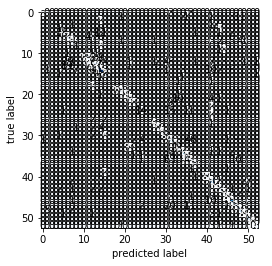

In [66]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [67]:
print(f'Accuracy Score : {accuracy_score(final_pred.subBrand, final_pred.Predictions)}')
print(f'F1 Score: {f1_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Precision: {precision_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')
print(f'Recall: {recall_score(final_pred.subBrand, final_pred.Predictions, average="macro")}')

Accuracy Score : 0.8918587208509478
F1 Score: 0.5944962389745175
Precision: 0.6043865991289492
Recall: 0.5912374633066204


C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\narendran.thesma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
#final_pred.to_csv("final_output_SubBrand_v4.csv", index_label=False, index=False)

In [83]:
len(final_pred)

20860

In [51]:
#test_subBrand

In [52]:
len(submission)

15062

In [54]:
#final_pred.isnull().sum()